1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

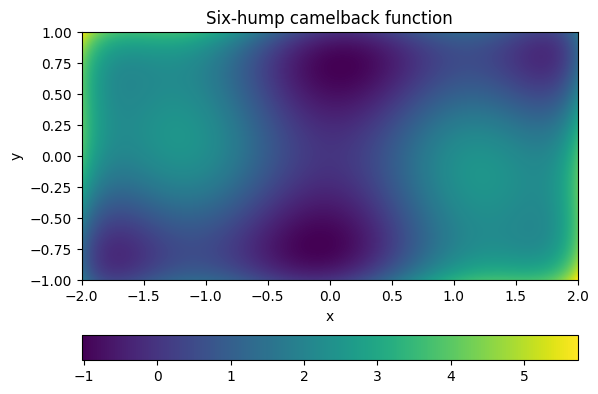

Number of global minima found:  2
Position of the minimas:  [ 0.08984283 -0.71265717] [-0.08984284  0.71265716]
Function values:  -1.03162845 -1.03162845
Minimization success:  True True
Obtained min with starting point (0,0):  0.0
Check correctness of min:  False


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import matplotlib.pylab as pla

def f(x,y):
    return (4-2.1*x**2+(x**4)/3)*x**2 + x*y + (4*y**2 -4)*y**2


x = np.linspace(start=-2, stop=2, num=1000)
y = np.linspace(start=-1, stop=1, num=500)

xv, yv = np.meshgrid(x, y)


pla.imshow(f(xv,yv), extent=(-2,2,-1,1))
pla.colorbar(orientation='horizontal')
pla.xlabel('x')
pla.ylabel('y')
pla.title('Six-hump camelback function')
pla.show()


#Minimization

def fun(k):
    x = k[0]
    y = k[1]
    return (4-2.1*x**2+(x**4)/3)*x**2 + x*y + (4*y**2 -4)*y**2


#Generate starting points with a distance of step
step = 0.5
starting_points = np.meshgrid(np.arange(-2+step, 2, step), np.arange(-1+step, 1, step))

p = [[starting_points[0][i][j],(starting_points[1][i][j])] for i in range(np.size(starting_points[0], axis=0)) for j in range(np.size(starting_points[0], axis=1)) ]

#look for solutions starting from each point in a limited area around that point
solutions = [optimize.minimize(fun, x, bounds=[(x[0]-step/2,x[0]+step/2),(x[1]-step/2,x[1]+step/2)]) for x in p]
# get the actual global minima
computed_mins = np.round(np.array([solution['fun'] for solution in solutions]), decimals = 8)
idxs = np.where(computed_mins == computed_mins.min())[0]
solution = [solutions[i] for i in idxs]

print('Number of global minima found: ', len(idxs))
print('Position of the minimas: ', solution[0]['x'],solution[1]['x'])
print('Function values: ', np.round(solution[0]['fun'], decimals = 8), np.round(solution[1]['fun'], decimals = 8))
print('Minimization success: ', solution[0]['success'],solution[1]['success'])


#Solution with starting point (0,0)
sol = optimize.minimize(fun, (0,0))

print('Obtained min with starting point (0,0): ', sol['fun'])
print('Check correctness of min: ', np.allclose(np.round(solution[0]['fun'], decimals = 8),  sol['fun']))



2\. **Non-linear ODE: the damped pendulum**

The equation of the motion that a pendulum makes with respect to the angle $\theta$ with the vertical is given by:

$$\frac{d^2\theta}{dt^2} = -\frac{1}{Q} \frac{d\theta}{dt} + \sin\theta + d \cos\Omega t$$

where $t$ is time, $Q$ is the damping factor, $d$ is the forcing amplitude, and $\Omega$ is the driving frequency of the forcing. 

This second order ODE needs to be written as two coupled first order ODEs defining a new variable $\omega \equiv d\theta/dt$:

$$\frac{d\theta}{dt} = \omega$$
$$\frac{d\omega}{dt} = -\frac{1}{Q}\,\omega + \sin\theta + d \cos\Omega t$$

Consider the initial conditions $\theta_0 = \omega_0 = 0$, and $Q = 2.0$, $d = 1.5$, and $\omega = 0.65$.

 - Solve the ODE with `odeint` over a pariod of 200 time steps
 - Create two plots, one of $\theta$ as a function of the time, and $\omega$ as a function of the time
 - **Optional**: determine if there is a set of parameters for which the motion is chaotic.

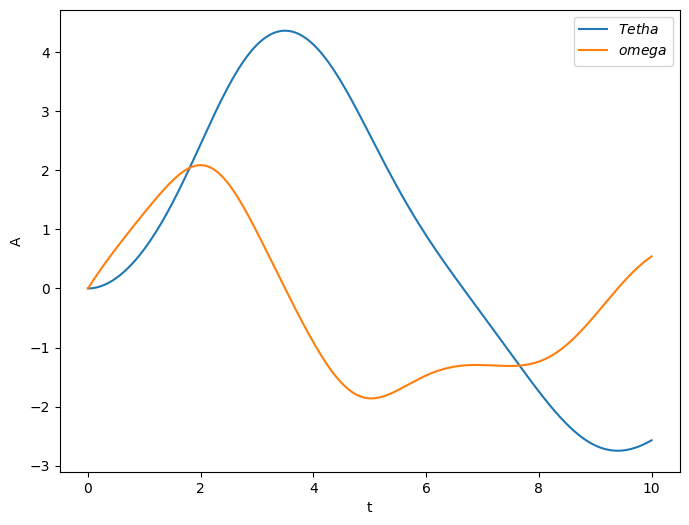

In [9]:
from scipy.integrate import odeint
import math as mt

Q = 2.0
d = 1.5
Omega = 0.65

def derivative(X, time, Q, d, Omega):
    return (X[1], (-1/Q)*X[1] + mt.sin(X[0]) + d*mt.cos(Omega*time))  #DA INTERNET PARE SIA -sin

t = np.linspace(0, 10, 200)   #Da capire cosa intende per 200 time steps


X_init = (0,0)

X = odeint(derivative, X_init, t, args=(Q, d, Omega))

plt.figure(figsize=(8, 6))
plt.plot(t, X[:, 0], label="$Tetha$")
plt.plot(t, X[:, 1], label="$omega$")
plt.xlabel('t')
plt.ylabel('A')
plt.legend(loc='best')
plt.show()



# def derivative(X, time, Q, d, Omega):
#     return (X[1], (-1/Q)*X[1] + np.sin(X[0]) + d*np.cos(X[2]), Omega )  #DA INTERNET PARE SIA -sin

# t = np.linspace(0, 200, 200)   #Da capire cosa intende per 200 time steps


# X_init = (0,0,Omega)

# X = odeint(derivative, X_init, t, args=(Q, d, Omega))

# plt.figure(figsize=(8, 6))
# plt.plot(t, X[:, 0], label="$Tetha$")
# plt.plot(t, X[:, 1], label="$omega$")
# plt.xlabel('t')
# plt.ylabel('A')
# plt.legend(loc='best')
# plt.show()

3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

The dataset is the one dowloaded at the beginning of Lecture 06:

 - `!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/`

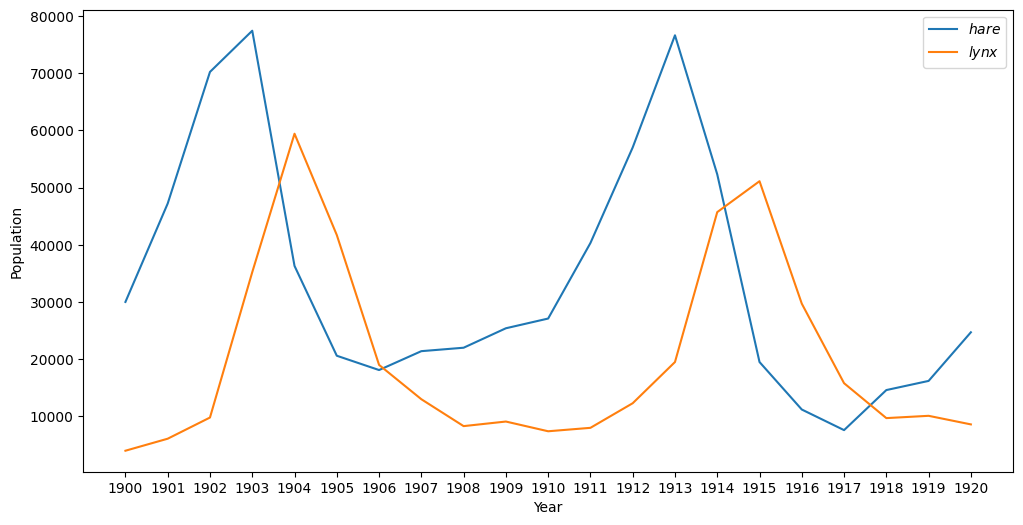

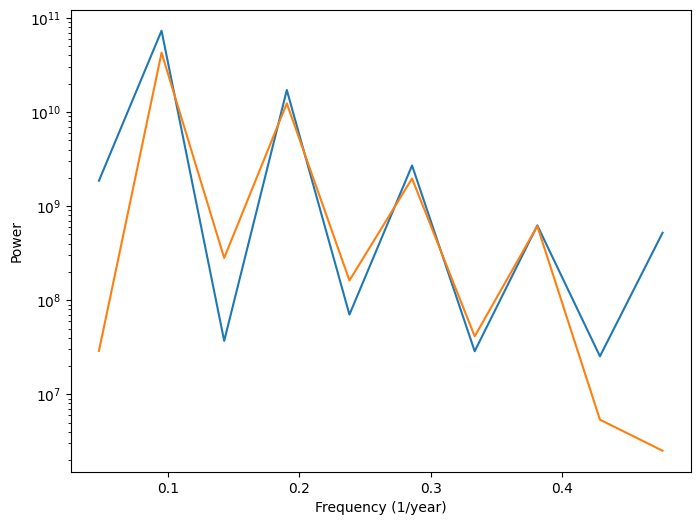

Hare population period:  10.5  years
Lynx population period:  10.5  years


In [10]:
import pandas as pd
from scipy import fftpack

df = pd.read_csv('data/populations.txt', sep= '\t')
# display(df)

hare = df['hare'].to_numpy()
lynx = df['lynx'].to_numpy()
year = df['# year'].to_numpy()
# year = np.round(year)

plt.figure(figsize=(12, 6))
plt.plot(year, hare, label = '$hare$')
plt.plot(year, lynx, label = '$lynx$')
plt.legend(loc='best')
plt.xlabel('Year')
plt.xticks(year)
plt.ylabel('Population')
plt.show()


hare_fft = fftpack.fft(hare)
lynx_fft = fftpack.fft(lynx)

hare_psd = abs(hare_fft)**2
lynx_psd = abs(lynx_fft)**2

fftfreq = fftpack.fftfreq(len(hare_psd))
i = fftfreq > 0

plt.figure(figsize=(8, 6))
plt.plot(fftfreq[i], hare_psd[i], label = '$hare$')
plt.plot(fftfreq[i], lynx_psd[i], label = '$lynx$')
plt.xlabel('Frequency (1/year)')
plt.ylabel('Power')
plt.yscale('log')
plt.show()

hare_peak_freq = fftfreq[i][np.argmax(hare_psd[i])]
lynx_peak_freq = fftfreq[i][np.argmax(lynx_psd[i])]

print('Hare population period: ', 1/hare_peak_freq, ' years')
print('Lynx population period: ', 1/lynx_peak_freq, ' years')

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("images/moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

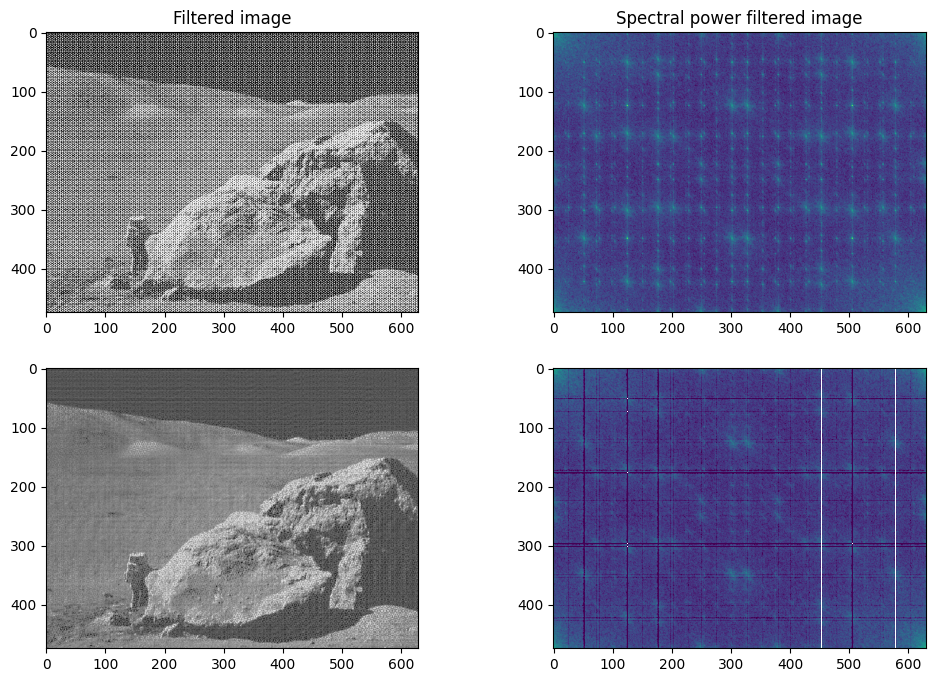

In [11]:
from matplotlib.colors import LogNorm


fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))


img = plt.imread('images/moonlanding.png')
ax1[0].imshow(img, cmap='Greys_r')
ax1[0].set_title('Original image')



img_fft = fftpack.fft2(img)
img_pow = abs(img_fft)


ax1[1].imshow(img_pow, norm=LogNorm(vmin=5))
ax1[1].set_title('Spectral power original image')


threshold = img_pow.mean() 
tol = 25

col_mean = np.mean(img_pow, axis = 1)
row_mean = np.mean(img_pow, axis = 0)

row_mask = (abs(col_mean-threshold)>tol)
row_mask[:15] = False
row_mask[len(row_mask)-15:] = False

col_mask = (abs(row_mean-threshold)>tol)
col_mask[:25] = False
col_mask[len(col_mask)-25:] = False

for i in range(np.size(img_fft, axis=0)):
    img_fft[i,:][col_mask] = 0
    img_pow[i,:][col_mask] = 0

for i in range(np.size(img_fft, axis=1)):
    img_fft[:,i][row_mask] = 0
    img_pow[:,i][row_mask] = 0


ax2[1].imshow(img_pow, norm=LogNorm(vmin=5))
ax1[1].set_title('Spectral power filtered image')



new_img = np.abs(fftpack.ifft2(img_fft))
ax2[0].imshow(new_img, cmap='Greys_r')
ax1[0].set_title('Filtered image')

plt.show()



